# Microbiome Data


   This real data application uses microbiome data [[8](../references.md#8)]. The dataset itself contains information on 160 bacteria genera from 37 patients. The bacteria counts were $\log_2$-transformed and normalized to have a constant average across samples.

First, let's load and organize data.

In [2]:
zerosum = readcsv(joinpath(Pkg.dir("ConstrainedLasso"), "docs/src/demo/misc/zerosum.csv"), header=true)[1]
y = zerosum[:, 1]

37-element Array{Float64,1}:
   3.1158 
   3.21448
 -11.1341 
  -5.13988
  -4.8247 
  -4.79219
 -11.5719 
  -5.77868
   4.97972
  -3.38806
  -9.90973
   3.07384
   2.77814
   ⋮      
  -7.41032
   4.70871
   1.49355
   3.93736
  -3.29476
 -10.9239 
 -11.021  
   3.18789
  -8.73771
 -11.499  
   3.66284
  -8.88277

In [3]:
X = zerosum[:, 2:end]

37×160 Array{Float64,2}:
 0.0  3.32193  0.0  1.0      10.5304   …  0.0      0.0  0.0  0.0  12.513  
 0.0  4.08746  0.0  0.0       7.35755     0.0      0.0  0.0  0.0   0.0    
 0.0  0.0      0.0  0.0       0.0         0.0      0.0  0.0  0.0   0.0    
 0.0  3.32193  0.0  0.0       0.0         0.0      0.0  0.0  0.0   0.0    
 0.0  1.0      0.0  0.0       0.0         0.0      0.0  0.0  0.0   1.0    
 0.0  3.16993  0.0  0.0       0.0      …  0.0      0.0  0.0  0.0   0.0    
 0.0  0.0      0.0  0.0       1.0         1.58496  0.0  0.0  0.0   0.0    
 0.0  0.0      0.0  0.0       0.0         0.0      0.0  0.0  0.0   0.0    
 0.0  0.0      0.0  0.0       4.64386     0.0      0.0  0.0  0.0   1.58496
 0.0  1.0      0.0  0.0       0.0         0.0      0.0  0.0  1.0   0.0    
 0.0  0.0      0.0  0.0       0.0      …  0.0      0.0  0.0  0.0   1.0    
 0.0  5.45943  0.0  0.0       3.90689     0.0      0.0  0.0  0.0   1.58496
 0.0  4.70044  0.0  0.0       0.0         0.0      0.0  0.0  0.0   0.0    


[Altenbuchinger et al.](../references.md#1) demonstrated that a sum-to-zero constraint is useful anytime the normalization of data relative to some reference point results in proportional data, as is often the case in biological applications, since the analysis using the constraint is insensitive to the choice of the reference. [Altenbuchinger et al.](../references.md#1) derived a coordinate descent algorithm for the elastic net with a zero-sum constraint, 

$$\begin{split}
& \text{minimize} \hspace{1em} \frac{1}{2} ||\boldsymbol{y}-\boldsymbol{X\beta}||^2_2 + \rho\Big(||\boldsymbol{\beta}||_1 + \frac{1-\alpha}{2}||\boldsymbol{\beta}||_2^2\Big) \\
& \text{subject to} \hspace{1em} \sum_j \beta_j = 0
\end{split}$$


but the focus of their analysis corresponds to $\alpha = 1$. Hence the problem is reduced to the constrained lasso.

We set up the zero-sum constraint.

In [4]:
n, p = size(X)
Aeq = ones(1, p)
beq = 0.0
m1 = size(Aeq, 1);

Now we estimate the constrained lasso solution path using path algorithm.

In [ ]:
using ConstrainedLasso
β̂path, ρpath, = lsq_classopath(X, y; Aeq = Aeq, beq = beq)

In [6]:
β̂path

160×79 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.484646   0.488903   0.490802 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.209662  -0.248845  -0.253282 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.897273   0.888551   0.889344 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0        0.0        0.0      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   

Then we calculate $L_1$ norm of coefficients at each $\rho$.

In [7]:
norm1path = zeros(size(β̂path, 2))
for i in eachindex(norm1path)
    norm1path[i] = norm(β̂path[:, i], 1)
end
norm1path

79-element Array{Float64,1}:
  0.0     
  0.0     
  0.1462  
  0.236204
  0.368326
  0.75722 
  1.08009 
  1.43022 
  1.45122 
  1.6103  
  1.95359 
  1.9595  
  1.96205 
  ⋮       
 11.2506  
 11.5025  
 11.8854  
 11.9934  
 12.0591  
 12.2261  
 12.2836  
 12.7327  
 12.9722  
 13.0533  
 13.221   
 13.2708  

Now, let's plot the solution path, $\widehat{\boldsymbol{\beta}}(\rho)$, as a function of $||\widehat{\boldsymbol{\beta}}(\rho)||_1$ using constrained lasso.


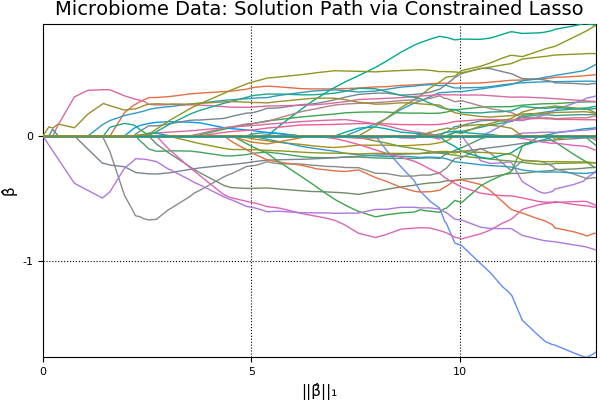

In [8]:
using Plots; pyplot();
plot(norm1path, β̂path', xaxis = ("||β̂||₁"), yaxis=("β̂"), label="")
title!("Microbiome Data: Solution Path via Constrained Lasso")

In [ ]:
savefig("misc/micro.svg"); 

*Follow the [link](https://github.com/Hua-Zhou/ConstrainedLasso.jl/blob/master/docs/src/demo/micro.ipynb) to access the .ipynb file of this page.*